# Activity 7 : Developing end to end Text Classifiers

Use the following methods to classify the Wikipedia comments (classes: toxic or not): <br>
1) Logistic Regression <br>
2) Random Forest <br>
3) XG-Boost <br>

Which tokens (i.e. words) seem to be important predictors while using Random Forest and XG-Boost <br>

Divide the data into training and validation set. Evaluate the models developed on the hold out validation set using parameters like Confusion matrix, Accuracy, Precision, Recall, F1. Plot ROC curve and find area under it.

Data source: The data has been adapted from https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data
The dataset under CC0, with the underlying comment text being governed by Wikipedia's CC-SA-3.0

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix,precision_recall_curve,auc

In [15]:
data = pd.read_csv('data_ch3/train_comment_small.csv')
data.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [16]:
data['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [4]:
def clf_model(model_type, X_train, y_train, X_valid):
    model = model_type.fit(X_train,y_train)
    predicted_labels = model.predict(X_valid)
    predicted_probab = model.predict_proba(X_valid)[:,1]
    return [predicted_labels,predicted_probab, model]

In [5]:
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    cfn_mat = confusion_matrix(actual_values,predicted_values)
    print("confusion matrix: \n",cfn_mat)
    print("\naccuracy: ",accuracy_score(actual_values,predicted_values))
    print("\nclassification report: \n", classification_report(actual_values,predicted_values))
    fpr,tpr,threshold=roc_curve(actual_values, predicted_probabilities)
    print ('\nArea under ROC curve for validation set:', auc(fpr,tpr))
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()

In [6]:
lemmatizer = WordNetLemmatizer()

In [7]:
stop_words = stopwords.words('english')

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

In [17]:
data['cleaned_comment_text'] = data['comment_text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [18]:
tfidf_model = TfidfVectorizer(max_features=500)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(data['cleaned_comment_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,100,11,12,20,2005,2006,2007,2008,24,...,wp,write,writing,written,wrong,wrote,www,year,yes,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.537393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(tfidf_df, data['toxic'], \
                                                      test_size=0.2, random_state=42,stratify = data['toxic'])

## Logistic Regression

confusion matrix: 
 [[28705   151]
 [ 1663  1396]]

accuracy:  0.943161522794924

classification report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28856
           1       0.90      0.46      0.61      3059

   micro avg       0.94      0.94      0.94     31915
   macro avg       0.92      0.73      0.79     31915
weighted avg       0.94      0.94      0.93     31915


Area under ROC curve for validation set: 0.911224422146723


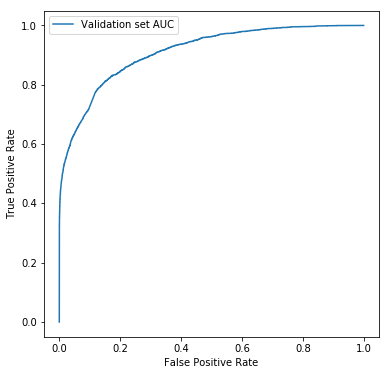

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
results = clf_model(logreg, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])

## Random Forest

confusion matrix: 
 [[28856     0]
 [ 3033    26]]

accuracy:  0.9049663167789441

classification report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     28856
           1       1.00      0.01      0.02      3059

   micro avg       0.90      0.90      0.90     31915
   macro avg       0.95      0.50      0.48     31915
weighted avg       0.91      0.90      0.86     31915


Area under ROC curve for validation set: 0.85065184401802


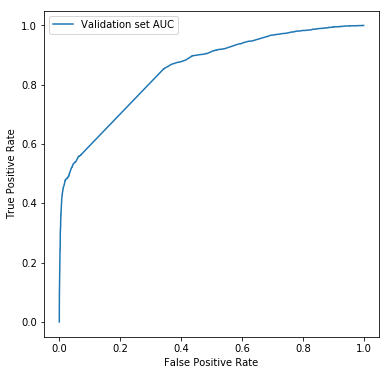

In [20]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=20,max_depth=4,max_features='sqrt',random_state=1)
results = clf_model(rfc, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])
model_rfc = results[2]

In [21]:
word_importances = pd.DataFrame({'word':X_train.columns,'importance':model_rfc.feature_importances_})
word_importances.sort_values('importance', ascending = False).head(20)

,word,importance
49,awful,0.153099
42,as,0.115293
456,unpleasant,0.112053
414,stupid,0.109239
386,shit,0.066292
280,nightmare,0.054091
279,nigger,0.045334
170,gay,0.044363
233,life,0.039181
176,go,0.025438


## XG-Boost

confusion matrix: 
 [[28765    91]
 [ 1993  1066]]

accuracy:  0.93470155099483

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28856
           1       0.92      0.35      0.51      3059

   micro avg       0.93      0.93      0.93     31915
   macro avg       0.93      0.67      0.74     31915
weighted avg       0.93      0.93      0.92     31915


Area under ROC curve for validation set: 0.7928326828178074


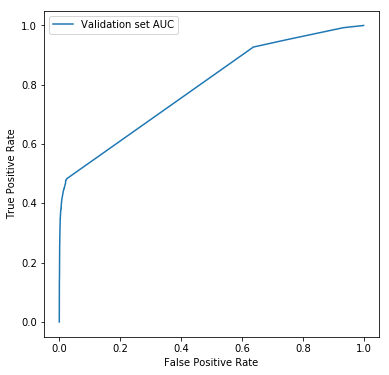

In [22]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(n_estimators=20,learning_rate=0.03,max_depth=5,subsample=0.6,colsample_bytree= 0.6,reg_alpha= 10,seed=42)
results = clf_model(xgb_clf, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])
model_xgb = results[2]

In [23]:
word_importances = pd.DataFrame({'word':X_train.columns,'importance':model_xgb.feature_importances_})
word_importances.sort_values('importance', ascending = False).head(20)

,word,importance
414,stupid,0.072423
42,as,0.058496
386,shit,0.050139
49,awful,0.050139
456,unpleasant,0.044568
280,nightmare,0.044568
41,article,0.041783
170,gay,0.030641
191,hate,0.027855
264,might,0.022284
